In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [130]:
df =pd.read_csv('datasets/train.csv')

In [131]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



### columns types

**numerical type**
- age, fere, passengerid

**catigorical**
- survived, pclass, sex, sibsp, parch, embarked

**Mixed**
name, ticket, cabin




### Steps of doing Univariate Analysis on Numerical columns

- **Descriptive Statistics**:  use .descibe() method for understand statistics 

- **Visualizations**: Create plots hist for distributions,KDE for checking smoothness and skewness and box for outiers

- **Identifying Outliers**: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- **Skewness**: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- **Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis

**univariate analysis on Age column**
- descriptive statistic is fine there no such errors
- the most people age is between 18 and 40
- the density almos distributed
- outliers in the age column
- 177 values (20%) of age are missing


In [132]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [133]:
df['Age'].isnull().sum()/len(df['Age'])

np.float64(0.19865319865319866)

<Axes: ylabel='Frequency'>

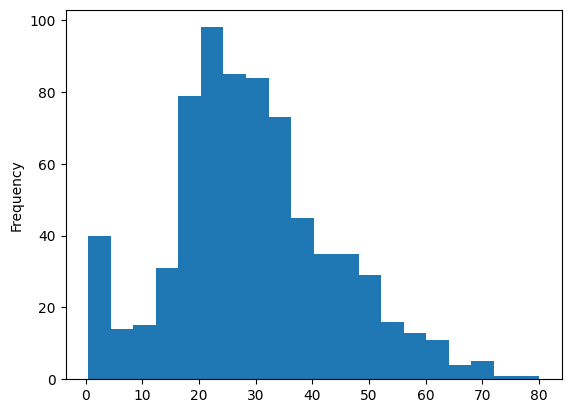

In [134]:
df['Age'].plot(kind='hist',bins=20)

<Axes: ylabel='Density'>

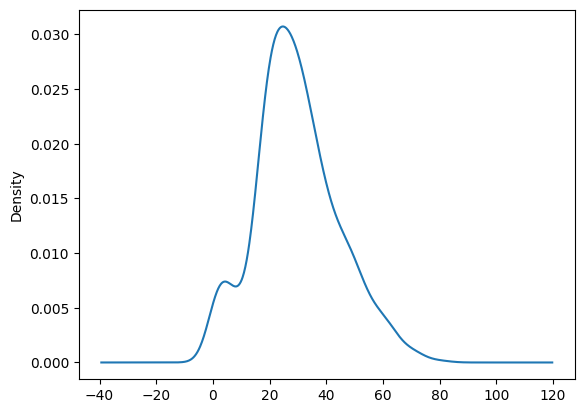

In [135]:
df['Age'].plot(kind='kde')

<Axes: >

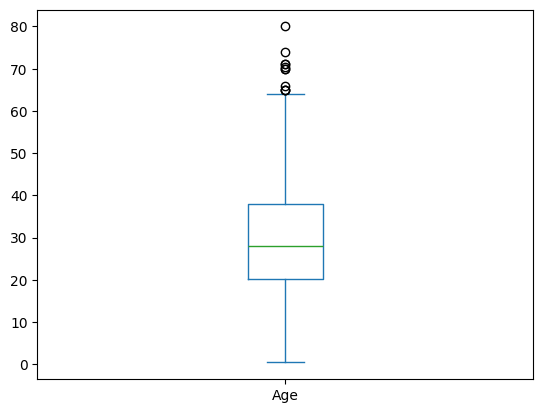

In [136]:
df['Age'].plot(kind='box')

**Fare**

- conclusion
- the data is very highly(positive) skewed
- the fare is for grouped not for individuls



In [137]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

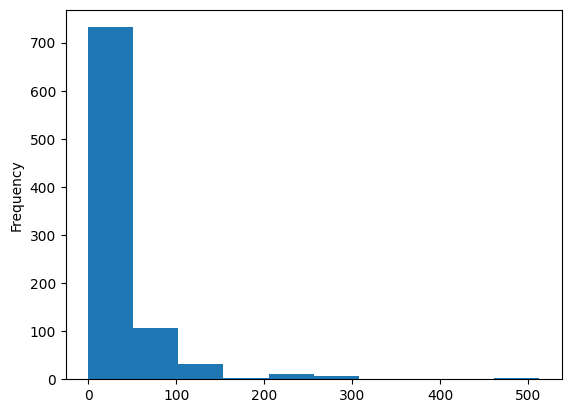

In [138]:
df['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

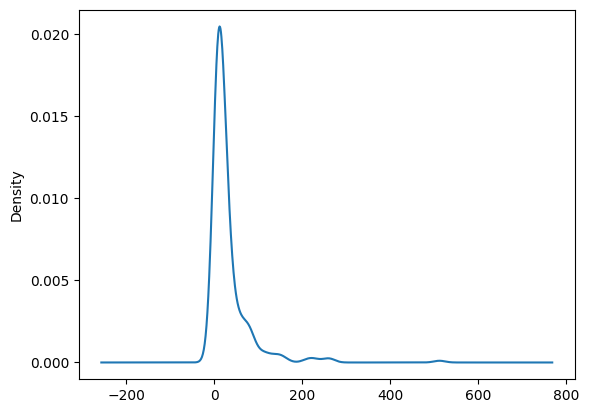

In [139]:
df['Fare'].plot(kind='kde')

In [140]:

df['Fare'].skew()

np.float64(4.787316519674893)

<Axes: >

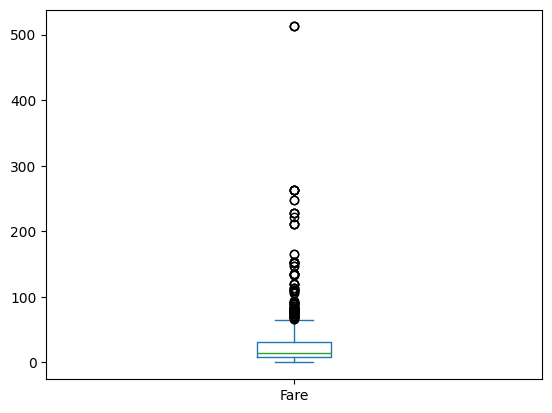

In [141]:
df['Fare'].plot(kind='box')

In [142]:
df[df['Fare']> 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


### Steps of doing Univariate Analysis on Categorical columns

**Descriptive Statistics**: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

**Visualizations**: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include count plots and pie charts. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

**Missing Values**: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

**Conclusion**: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

**catigorical**
- survived,pclass,sex,sibsp,parch,embarked

### Survived

***Conclusions***
- about 62% peple were died

In [143]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

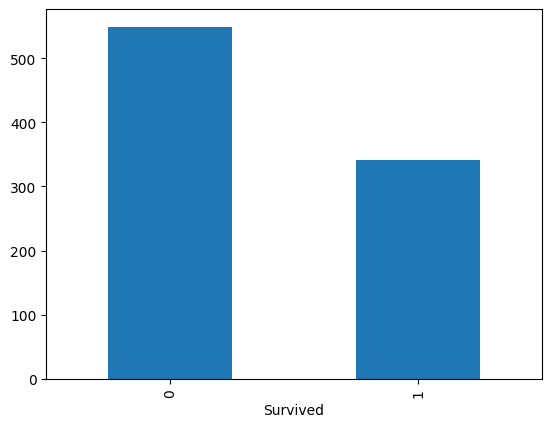

In [144]:
df["Survived"].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

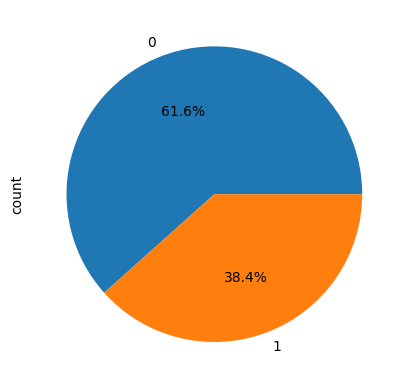

In [145]:
df["Survived"].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Pclsaa

***Conclusions***
- suprisingly more people travling in 1 class then 2nd class

In [146]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### sebp and parch

**conclusions**
- sebp and parch should be merg and create new column family size
- create new column is_alone


In [147]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

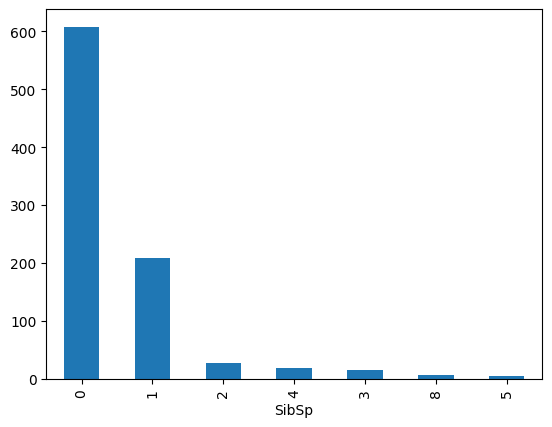

In [148]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

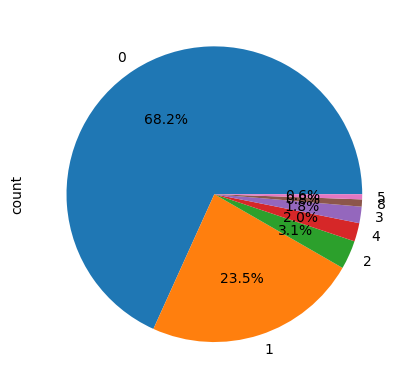

In [149]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [150]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: ylabel='count'>

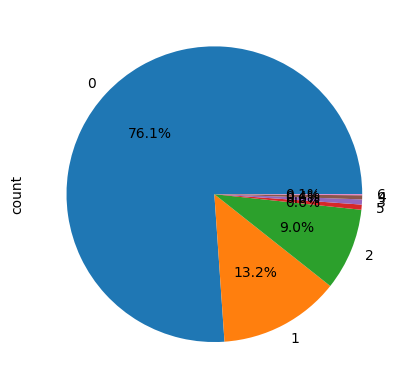

In [151]:
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='Parch'>

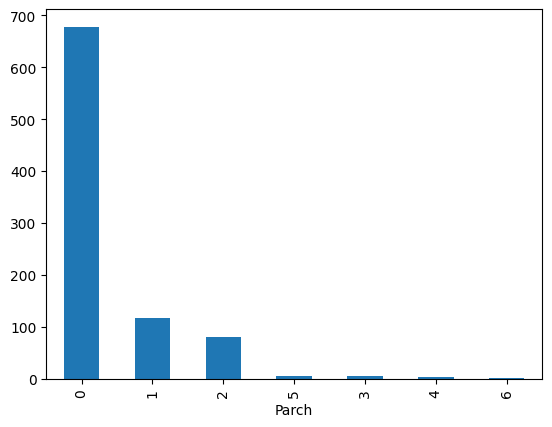

In [152]:
df['Parch'].value_counts().plot(kind='bar')

### Steps of doing Bivariate Analysis

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps
        
- Write your conclusions

In [153]:
# catigorical -> to catigorical
(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


In [154]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Pclass', ylabel='Survived'>

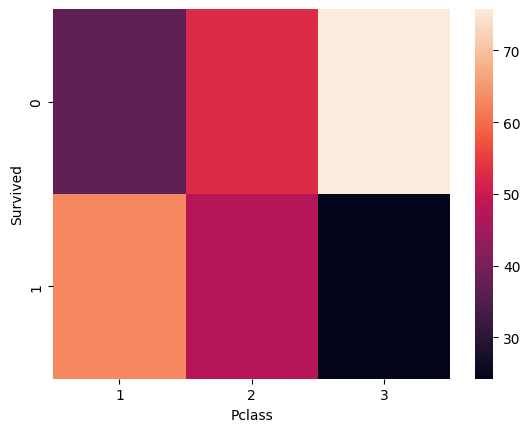

In [155]:

sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100)

In [156]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


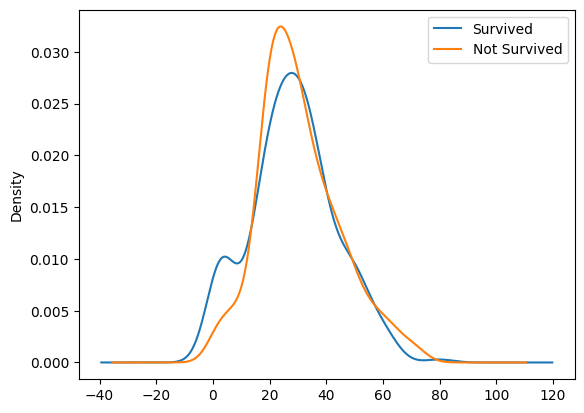

In [157]:
# survived and age

df[df['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived'] == 0]['Age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

In [158]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [159]:
df[df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [160]:
df1 = pd.read_csv('datasets/test (1).csv')


In [161]:
df = pd.concat([df,df1])

In [162]:
df['individual fare']=df['Fare']/(df['SibSp'] + df['Parch'] +1)

In [163]:
# family_type
# 1 -> alone
# 2-4 -> small
# >5 -> large

def family_size(num):
    if num == 1:
        return 'Alone'
    elif num>1 and num<5:
        return 'Small'
    else:
        return "Large"
    

In [164]:
df['family_size']= ( df['Parch'] + df['SibSp']+1)

In [165]:
df['family_type']= df['family_size'].apply(family_size)

In [166]:
# surname
df['Surname']=df['Name'].str.split(',').str.get(0)

In [167]:
df['Cabin'].isnull().sum()/len(df['Cabin'])
df.fillna('M',inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_8360\162536378.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'M' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('M',inplace=True)
